In [ ]:
from mnist import load_mnist
import numpy as np
import matplotlib.pyplot as plt
from typing_extensions import Counter
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
train, validation, test = load_mnist()


Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [ ]:
class my_PCA():
    def __init__(self, n_components=None):
        pass

    def fit(self, X):
      self.X_mean = X.mean(axis=0)
      X_centred = X - self.X_mean
      C_matrix = X_centred.T @ X_centred

      lamb, F = np.linalg.eig(C_matrix)
      idx = np.argsort(lamb)[::-1]
      self.lamb_sorted = lamb[idx]
      F_sorted = F[:, idx]
      self.vt = F_sorted[:, :64]



    def transform(self, X):
      X_centred = X - self.X_mean

      Y = X_centred @ self.vt
      print(Y.shape)
      return Y

    def fit_transform(self, X):
      self.fit(X)
      return self.transform(X)



In [ ]:
class my_kNN():
    def __init__(self, n_neighbors=30):
      self.n_neighbors = n_neighbors


    def fit(self, X, y):
      self.X_train = X
      self.y_train = y


    def predict(self, X):
      y_predict = []
      for x in X:

        distance = np.linalg.norm(self.X_train - x, axis = 1)

        k_nearest = np.argsort(distance)[:self.n_neighbors]


        types = self.y_train[k_nearest]
        m = Counter(types).most_common(1)[0][0]
        y_predict.append(m)

      return np.array(y_predict)


In [ ]:
X = train[0]

X = X.reshape(55000, -1)

lables = train[1]



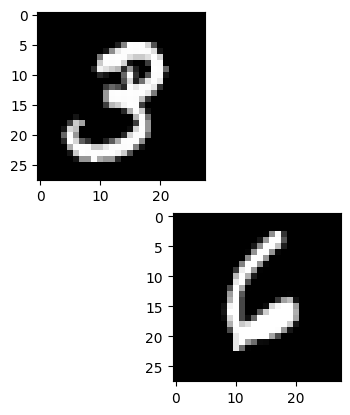

In [ ]:

plt.subplot(2, 2, 4)
plt.imshow(X[3].reshape(28, 28), cmap="grey")

plt.subplot(2, 1, 1)
plt.imshow(X[1].reshape(28, 28), cmap="grey")




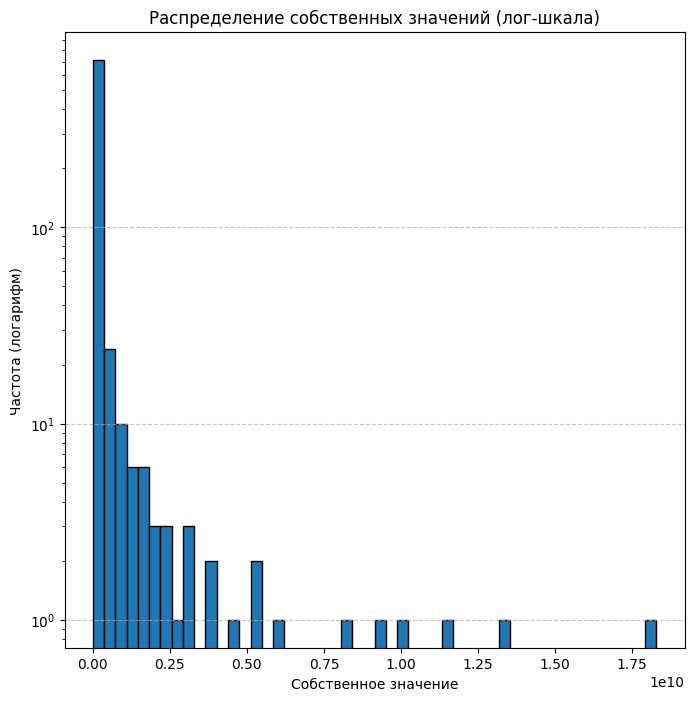

In [ ]:
pca = my_PCA()
pca.fit(X)

plt.figure(figsize=(8, 8))
plt.hist(pca.lamb_sorted, bins=50, edgecolor='black')
plt.yscale('log')
plt.xlabel("Собственное значение")
plt.ylabel("Частота")
plt.title("Распределение собственных значений")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

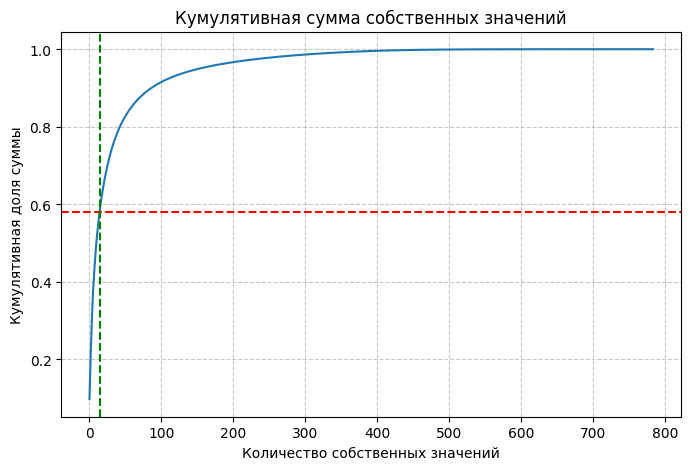

In [ ]:
pca = my_PCA()
pca.fit(X)
cumsum = np.cumsum(pca.lamb_sorted)
ratio = cumsum /  cumsum[-1]
plt.figure(figsize=(8, 5))
plt.plot(ratio)
plt.axhline(y=ratio[14], color='r', linestyle='--')
plt.axvline(x=14, color='g', linestyle='--')
plt.xlabel("Количество собственных значений")
plt.ylabel("Кумулятивная доля суммы")
plt.title("Кумулятивная сумма собственных значений")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

(55000, 64)


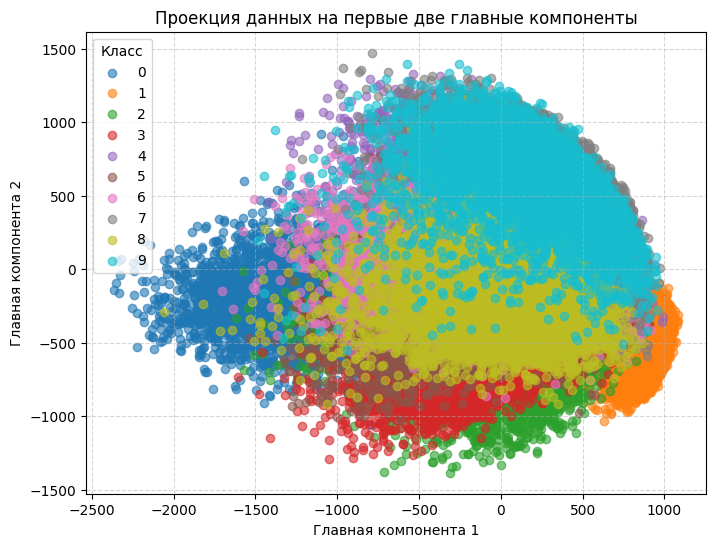

In [ ]:
pca = my_PCA()

pca.fit(X)
X_pca = pca.transform(X)

classes = np.unique(lables)
plt.figure(figsize=(8,6))
for cls in classes:
    plt.scatter(X_pca[lables==cls, 0], X_pca[lables==cls, 1], label=str(cls), alpha=0.6)
plt.legend(title="Класс")


plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.title("Проекция данных")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, lables, train_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
pca = my_PCA()
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
print(X_train_pca.shape)
X_test_pca = pca.transform(X_test)


knn = my_kNN()

knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)
print(y_pred)
print(accuracy_score(y_test, y_pred))

(11000, 784) (11000,)
(11000, 64)
(11000, 64)
(44000, 64)
[8 5 5 ... 4 3 4]
0.9396363636363636
